In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset_path = '/content/drive/MyDrive/Miniproject/DATASET/English'

In [3]:
pip install librosa==0.6.3

In [4]:
pip install numba==0.48

Importing necessary libraries

In [5]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')

For ploting

In [6]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

To show sample audio

Sample Angry Audio

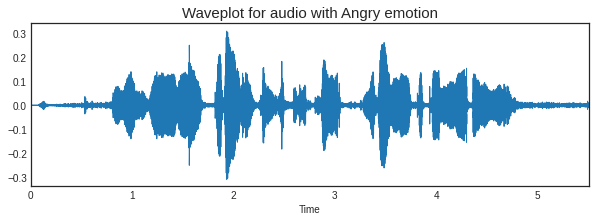

In [7]:
emotion='Angry'
path = '/content/drive/MyDrive/Miniproject/DATASET/English/FemaleAngry/FemaleAngry1.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

Sample Happy Audio 

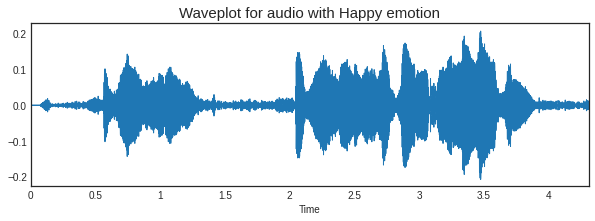

In [8]:
emotion='Happy'
path = '/content/drive/MyDrive/Miniproject/DATASET/English/FemaleHappy/FemaleHappy1.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

Sample Neutral Audio

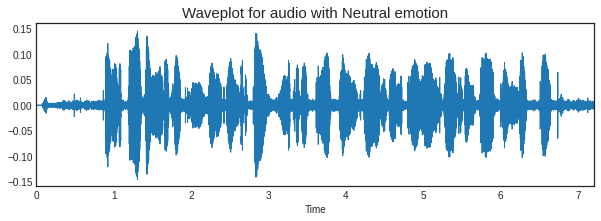

In [9]:
emotion='Neutral'
path = '/content/drive/MyDrive/Miniproject/DATASET/English/FemaleNeutral/FemaleNeutral1.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

Sample Sad Audio

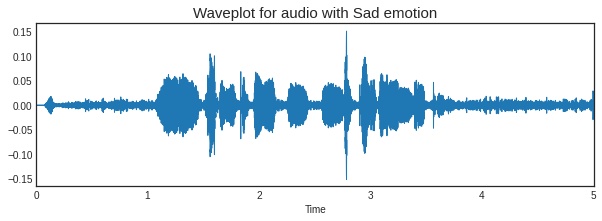

In [10]:
emotion='Sad'
path = '/content/drive/MyDrive/Miniproject/DATASET/English/FemaleSad/FemaleSad1.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

Adding augmentation

we will add noise, stretch and roll, pitch shift, higher speed and lower speed

In [11]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

To save the output file

In [12]:
def write_audio_file(file, data, sample_rate):
        librosa.output.write_wav(file, data, sample_rate)

taking any example and checking for techniques.

In [13]:
path = '/content/drive/MyDrive/Miniproject/DATASET/English/FemaleAngry/FemaleAngry1.wav'
data, sample_rate = librosa.load(path)

After addition of noise

[ 0.00789034 -0.00211118  0.00638801 ...  0.00214975 -0.00820292
 -0.00141108]


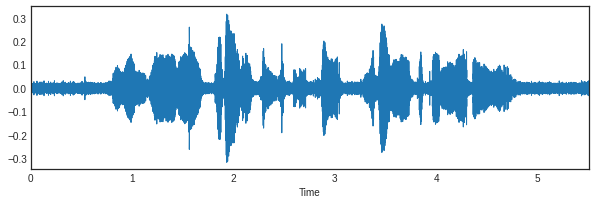

In [14]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveplot(y=x, sr=sample_rate)
print(x)
Audio(x, rate=sample_rate)

After addition of stretch

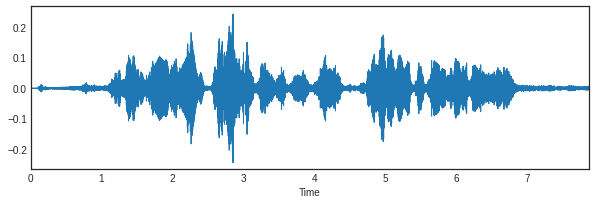

In [15]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

After addition of shift

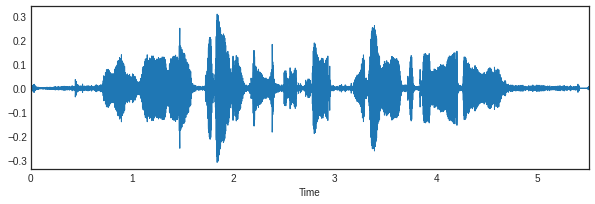

In [16]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

After addition of pitch

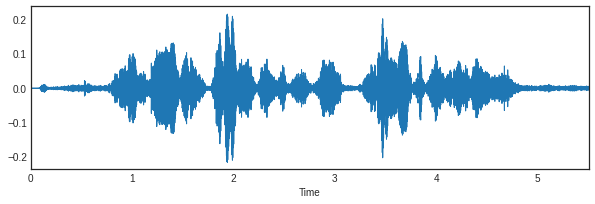

In [17]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

After making higher speed

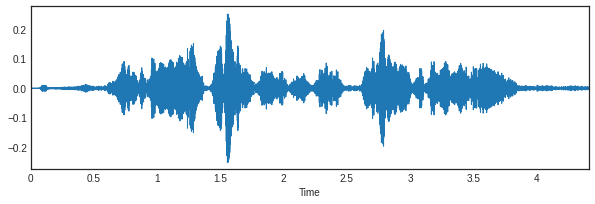

In [18]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

After lowering speed

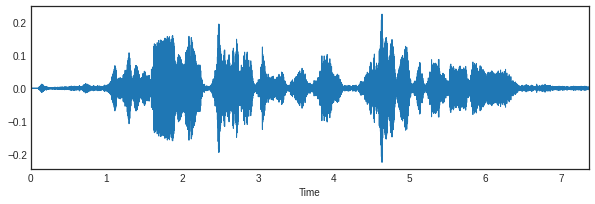

In [19]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [20]:
list_dataset=os.listdir(dataset_path)

In [21]:
list_dataset

['MaleAngry',
 'MaleHappy',
 'MaleSad',
 'MaleNeutral',
 'FemaleAngry',
 'FemaleHappy',
 'FemaleSad',
 'FemaleNeutral']

Applying each single dataset

In [22]:
length=len(list_dataset)
cmd0 = 0
cmd1 = 0
cmd2 = 0
cmd3 = 0
cmd4 = 0
cmd5 = 0
for i in range(0,length):
  e_path = a=os.listdir(dataset_path+'/'+list_dataset[i])
  for j in range(0, len(e_path)):
    
    path = dataset_path+'/'+list_dataset[i]+'/'+e_path[j]
    path1 =  dataset_path+'/'+list_dataset[i]+'/'
    word = list_dataset[i]
    data, sample_rate = librosa.load(path)

    x0 = noise(data)
    cmd0 +=1
    write_audio_file(dataset_path+'/'+list_dataset[i]+'/'+word+str(cmd0)+'noise.wav', x0,sample_rate)
    
    
    x1 = stretch(data)
    cmd1 +=1
    write_audio_file(dataset_path+'/'+list_dataset[i]+'/'+word+str(cmd1)+'stretch.wav', x1,sample_rate)


    x2 = shift(data)
    cmd2 +=1
    write_audio_file(dataset_path+'/'+list_dataset[i]+'/'+word+str(cmd2)+'shift.wav', x2,sample_rate)
    

    x3 = pitch(data, sample_rate)
    cmd3 +=1
    write_audio_file(dataset_path+'/'+list_dataset[i]+'/'+word+str(cmd3)+'pitch.wav', x3,sample_rate)
    
    
    x4 = higher_speed(data)
    cmd4 +=1
    write_audio_file(dataset_path+'/'+list_dataset[i]+'/'+word+str(cmd4)+'higher_speed.wav', x4,sample_rate)
    
    
    x5 = lower_speed(data)
    cmd5 +=1
    write_audio_file(dataset_path+'/'+list_dataset[i]+'/'+word+str(cmd5)+'lower_speed.wav', x5,sample_rate)